# Service Updates

- Provides rolling replacement of tasks / containers in a service
- Limits downtiem (be careful with "prevents" downtime)
- Will replace containers for most changes
- Has many, many cli options to control the update
- Create options will usually change, adding -add or -rm to them
- Includes rollback and healthcheck options
- Also has scale rollback subcommnad for quicker access
  - docker service scale web=4 and docker service ollback web
- a stack deploy, when pre-existing, will issue service updates

# Swarm Update Examples

- Just update the image used to a newer version
  - docker service update --image myapp:1.2.1 <servicename>
- Adding an environment variable and remove a port
  - docker service update --env-add NODE_ENV=production --publish-rm 8080
- Change number of replicas of two services
  - docker service scale web=8 api=6

```bash
docker service create -p 8080:80 --name web nginx:1.13.7

docker service scale web=5

docker service update --image nginx:1.13.6 web

docker service update --publish-rm 8080 --publish-add 9090:80 web

``` 

- go one at a time
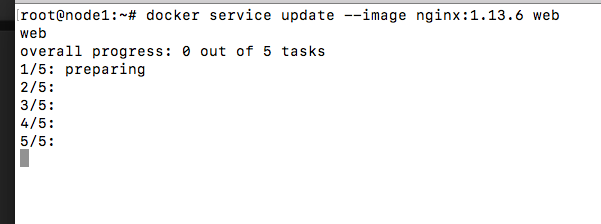

- rebalancing
```bash
docker service update --force web
``` 

# Docker Healthchecks

- HEALTHCHECK was added in 1.12
- Supported in Dockerfile, compose YAML, docker run, and Swarm Services
- Docker engine will exec's the command in the container 
  - e.g. curl localhost
- It expects exit 0(OK) or exit 1 (error)
- Three container states: starting, healthy, unhealthy
- Much better then "is binary still running?"
- Not a external monitoring replacement

### Docker Healthchecks cont.
- Healthcheck status shows up in docker container ls
- Check last 5 health checks with docker container inspect
- Docker run does nothing with healthchecks
- Services will replace tasks if they fail healthcheck
- Service updates wait for them before continuing

```bash

docker run \

  --health-cmd="curl -f localhost:9200/_cluster/health || false"\

  --health-interval=5s\

  --health-retires=3 \

  --health-timeout=2s \

  -- health-start-period=15s \

   elasticsearch:2

``` 

- options for healthcheck command
  - --interval=DURATION (default: 30s)
  - --timeout=DURATION (default: 30s)
  - --start-period=DUTATION (default: 0s) (17.09+)
  - --retries=N (default: 3)

- Basic command using default options
  - HEALTHCHECK curl -f http://localhost / || false
- Custom options with the command
  - HEALTHCHECK --timeout=2s --interval=3s --retries=3 \
  - CMD curl -f http://localhost/ || exit 1

### Healthcheck in Nginx Dockerfile
- Static website running in Nginx, just test default URL

FROM nginx:1.13
HEALTHCHECK --interval=30s --timeout=3s \
 CMD curl -f http://localhost\ || exit 1

```bash

FROM your-nginx-pp-fpm-combo-image

# don't do this if php-fpm is another container
# must enable php-fpm ping/status in pool.ini
# must forward/ping and /status urls from nginx to php-fpm



HEALTHCHECK --interval=5s --timeout=3s \

  CMD curl -f http://localhost/ping || exit `

```

### Healthcheck in postgres Dockerfile

Use a PostgresSQL utility to test for ready state

```bash
FROM postgres


# specify real user with -I to prevent errors in log

HEALTHCHECK --interval=5s -- timeout=3s \

CMD pg_isready -U postgres || exit 1

```

```bash

docker service create --name p1  -p postgres

docker service create --name p2 --health-cmd="pg_isready -U postgres || exit 1" postgres

``` 

# Container Registries

- An image registry needs to be pary of your container plan
- More Docker Hub details including auto-build
- How docker store is different then Hub
- How docker Cloud is different then Hub
- Use ned swarms feature in cloud to connect mac/win to swarm
- Install and use docker registry

# Docker Store

# Docker Cloud CI/CD and server ops

- web based docker swarm creation / management
- uses popular cloud hosters and bring-your-own-server
- automated image building, testin,g and deployment
- More advanced then what docker hub does for free
- Includes a image vulneraility 

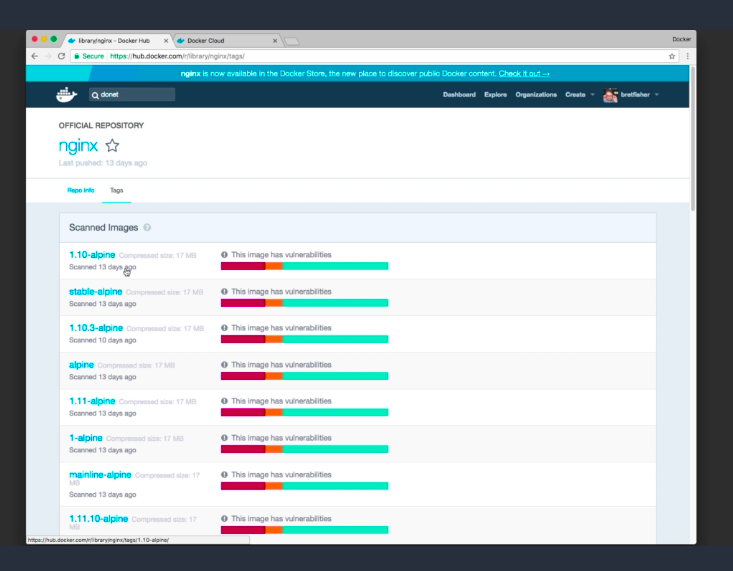